In [1]:
import os
from datetime import datetime 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
control_1 = pd.read_csv(r"C:\Users\yatha\Documents\archive (6)\data\control\control_1.csv")
condition_1 = pd.read_csv(r"C:\Users\yatha\Documents\archive (6)\data\condition\condition_1.csv")
print(f'control_1.shape: {control_1.shape}')
print(f'condition_1.shape: {condition_1.shape}')

control_1.shape: (51611, 3)
condition_1.shape: (23244, 3)


In [4]:
control_1.head()

,timestamp,date,activity
0,2003-03-18 15:00:00,2003-03-18,60
1,2003-03-18 15:01:00,2003-03-18,0
2,2003-03-18 15:02:00,2003-03-18,264
3,2003-03-18 15:03:00,2003-03-18,662
4,2003-03-18 15:04:00,2003-03-18,293


In [5]:
condition_1.head()

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166


<AxesSubplot:xlabel='activity', ylabel='Count'>

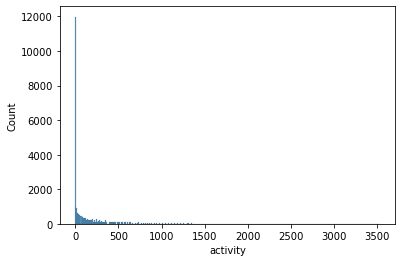

In [6]:
sns.histplot(x='activity', data=condition_1)

In [7]:
condition_1['activity'].skew()

3.8823677090908344

### From the above graph, it can be seen that there is high level of skewness, An alternative is taking the log or square root of activity

In [8]:
condition_1['log_activity'] = np.log(condition_1['activity'] + 1) # add + 1 because log(0) is infinity
condition_1['log_activity'].skew()

0.2771381485812395

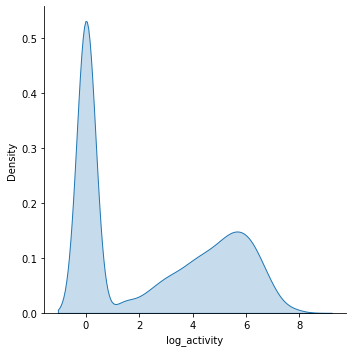

In [9]:
sns.displot(x='log_activity', data=condition_1, kind='kde', fill=True)

In [10]:
condition_1['sqrt_activity'] = np.sqrt(condition_1['activity'])
condition_1['sqrt_activity'].skew()

1.370447546298057

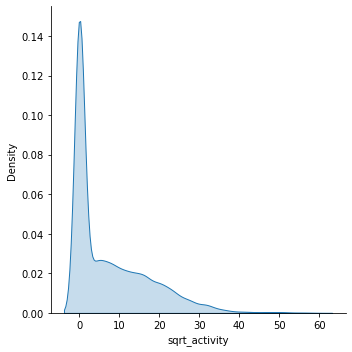

In [11]:
sns.displot(x='sqrt_activity', data=condition_1, kind='kde', fill=True)

In [12]:
condition_1.describe()

,activity,log_activity,sqrt_activity
count,23244.000000,23244.000000,23244.000000
mean,146.948030,2.562035,7.416512
std,294.592424,2.626393,9.588917
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,9.000000,2.302585,3.000000
75%,172.000000,5.153292,13.114877
max,3526.000000,8.168203,59.380131


In [13]:
control_1['activity'].skew()

5.039169993104665

In [14]:
control_1.describe()

,activity
count,51611.000000
mean,98.545078
std,289.655317
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,6117.000000


In [15]:
control_1['log_activity'] = np.log(control_1['activity'] + 1)
control_1['log_activity'].skew()

1.2517081703386566

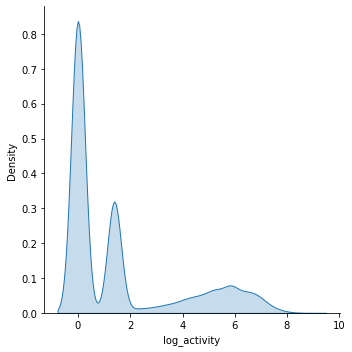

In [16]:
sns.displot(x='log_activity', data=control_1, kind='kde', fill=True)

In [17]:
condition_1.head()

,timestamp,date,activity,log_activity,sqrt_activity
0,2003-05-07 12:00:00,2003-05-07,0,0.000000,0.000000
1,2003-05-07 12:01:00,2003-05-07,143,4.969813,11.958261
2,2003-05-07 12:02:00,2003-05-07,0,0.000000,0.000000
3,2003-05-07 12:03:00,2003-05-07,20,3.044522,4.472136
4,2003-05-07 12:04:00,2003-05-07,166,5.117994,12.884099


In [18]:
df = condition_1.groupby('date')['log_activity'].mean().reset_index()
df.head()

,date,log_activity
0,2003-05-07,3.752204
1,2003-05-08,2.931977
2,2003-05-09,2.593095
3,2003-05-10,2.910573
4,2003-05-11,2.561446


In [22]:
def combine_data(path):
    dirs = os.listdir(path)
    combine_df = []
    
    for filepath in dirs:
        source = filepath.split('.')[0]
        if filepath.endswith('.csv'):
            X = pd.read_csv(path + filepath, parse_dates=['timestamp'], index_col='timestamp')
            X['source'] = source
            combine_df.append(X)
        
    return combine_df

In [29]:
combine_df=combine_data(r"C:\Users\yatha\Documents\archive (6)\data\condition")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\yatha\\Documents\\archive (6)\\data\\conditioncondition_1.csv'